In [29]:
import cv2
import matplotlib.pyplot as plt

In [34]:
def computeSafeRegion(shape,bounding_rect):
    
        top = bounding_rect[1] # y
        bottom  = bounding_rect[1] + bounding_rect[3] # y +  h
        left = bounding_rect[0] # x
        right =   bounding_rect[0] + bounding_rect[2] # x +  w
        min_top = 0
        max_bottom = shape[0]
        min_left = 0
        max_right = shape[1]

        if top < min_top:
            top = min_top
        if left < min_left:
            left = min_left
        if bottom > max_bottom:
            bottom = max_bottom
        if right > max_right:
            right = max_right
        return [left,top,right-left,bottom-top]   


In [35]:
def cropImage(image,rect):
    
        x, y, w, h = computeSafeRegion(image.shape,rect)

        return image[y:y+h,x:x+w]

In [36]:
def detectPlateRough(image_gray,resize_h = 720,en_scale =1.08 ,top_bottom_padding_rate = 0.05):
        if top_bottom_padding_rate>0.2:
            print("error:top_bottom_padding_rate > 0.2:",top_bottom_padding_rate)
            exit(1)
            
        height = image_gray.shape[0]
        padding = int(height*top_bottom_padding_rate)
        scale = image_gray.shape[1]/float(image_gray.shape[0])
        image = cv2.resize(image_gray, (int(scale*resize_h), resize_h))
        image_color_cropped = image[padding:resize_h-padding,0:image_gray.shape[1]]
        

        image_gray = cv2.cvtColor(image_color_cropped,cv2.COLOR_RGB2GRAY)
        watches = watch_cascade.detectMultiScale(image_gray, en_scale, 2, minSize=(36, 9),maxSize=(36*40, 9*40))
        cropped_images = []
        for (x, y, w, h) in watches:

            x -= w * 0.14
            w += w * 0.28
            y -= h * 0.15
            h += h * 0.3

            cropped = cropImage(image_color_cropped, (int(x), int(y), int(w), int(h)))
            cropped_images.append([cropped,[x, y+padding, w, h]])
        
        return cropped_images

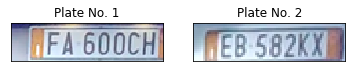

In [42]:
watch_cascade = cv2.CascadeClassifier('cascade.xml')
image = cv2.imread("car1.png")
images = detectPlateRough(image,image.shape[0],top_bottom_padding_rate=0.1)

k= len(images)//2
for i in range(len(images)):
    plt.subplot(k+1,2,i+3),plt.imshow(images[i][0])
    plt.title('Plate No. '+str(i+1)), plt.xticks([]), plt.yticks([])
    
    cv2.imwrite('Plate No. '+str(i+1)+'.png', images[i][0])